Importing the Libraries

In [1]:
import numpy as np
import pandas as pd

In this, we are predicting the admission on the basis of diff. exam given in the dataset.  
From kaggle => (https://www.kaggle.com/datasets/mohansacharya/graduate-admissions?select=Admission_Predict_Ver1.1.csv)

In [2]:
df = pd.read_csv("C:/Users/Hp/Downloads/Deep Learning/Admission_Predict_Ver1.1.csv")
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


GRE Scores=> out of 340.  
TOEFL Scores=> out of 120.  
University Rating=> out of 5.  
DOP=> Statement of Purpose ( out of 5 ).  
LOR=> Letter of Recommendation Strength ( out of 5 ).  
CGPA=> out of 10.  
Research=> "0" or "1".  
Chance of Admit=> from "0" to "1".

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


Checking the "null values" and "Duplicate values".

In [4]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [5]:
df.duplicated().sum()

0

We don't need the first column.  
So will drop it.

In [6]:
df.drop(columns=["Serial No."], axis=1, inplace= True)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [7]:
from sklearn.model_selection import train_test_split

Will spilt the dataset into "Dependent" and "Independent" variable.

In [8]:
x = df.iloc[:,0:-1]
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [9]:
y = df.iloc[:,-1]
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=41)

In [11]:
x_train.shape

(375, 7)

In [12]:
x_test.shape

(125, 7)

We will Standardize the "x" and "y" by "MinMaxScalar", beacuse we know the max limit/value of each variables in both "x" and "y" variables.

In [13]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()

x_train_scale = min_max.fit_transform(x_train)
x_test_scale = min_max.transform(x_test)

In [14]:
x_train_scale

array([[0.4       , 0.51851852, 0.5       , ..., 0.625     , 0.59935897,
        0.        ],
       [0.56      , 0.2962963 , 1.        , ..., 1.        , 0.63461538,
        1.        ],
       [0.58      , 0.62962963, 0.5       , ..., 0.375     , 0.63782051,
        0.        ],
       ...,
       [0.7       , 0.51851852, 0.5       , ..., 0.625     , 0.74038462,
        1.        ],
       [0.36      , 0.33333333, 0.25      , ..., 0.625     , 0.37820513,
        1.        ],
       [0.44      , 0.59259259, 0.25      , ..., 0.75      , 0.71153846,
        0.        ]])

In [15]:
x_test_scale

array([[ 0.32      ,  0.44444444,  0.25      ,  0.5       ,  0.375     ,
         0.46794872,  0.        ],
       [ 0.42      ,  0.33333333,  0.5       ,  0.875     ,  0.75      ,
         0.58974359,  1.        ],
       [ 0.12      ,  0.14814815,  0.25      ,  0.125     ,  0.25      ,
         0.32051282,  0.        ],
       [ 0.42      ,  0.22222222,  0.        ,  0.375     ,  0.5       ,
         0.5224359 ,  1.        ],
       [ 0.7       ,  0.66666667,  0.75      ,  0.75      ,  0.875     ,
         0.74038462,  1.        ],
       [ 0.64      ,  0.62962963,  0.5       ,  0.625     ,  0.5       ,
         0.69230769,  1.        ],
       [ 0.48      ,  0.51851852,  0.25      ,  0.375     ,  0.75      ,
         0.56410256,  0.        ],
       [ 0.56      ,  0.62962963,  0.        ,  0.375     ,  0.625     ,
         0.55769231,  1.        ],
       [ 0.18      ,  0.25925926,  0.        ,  0.125     ,  0.25      ,
         0.34935897,  0.        ],
       [ 0.2       ,  0.0740

Now, will again import the necessary library.

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

We will use activation = "relu" for "hidden Layer", as it is the best activation function.  
And activation= "linear" for output, as we can see that it is "regression model".

In [17]:
model = Sequential()

model.add(Dense(10, activation = 'relu', input_dim = 7))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1,activation = 'linear'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                80        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 201 (804.00 Byte)
Trainable params: 201 (804.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Will use loss = "mean_squared_error", because it is a "Regression model".

In [19]:
model.compile(loss= 'mean_squared_error', optimizer='Adam')

In [21]:
history = model.fit(x_train_scale, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 1s 27ms/step - loss: 0.1354 - val_loss: 0.0757
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0529 - val_loss: 0.0262
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0224 - val_loss: 0.0184
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0211 - val_loss: 0.0199
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0206 - val_loss: 0.0173
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0184 - val_loss: 0.0162
Epoch 7/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0178 - val_loss: 0.0157
Epoch 8/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0173 - val_loss: 0.0151
Epoch 9/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0168 - val_loss: 0.0147
Epoch 10/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0162 - val_loss: 0.0143
Epoch 11

In [22]:
y_pred = model.predict(x_test_scale)
y_pred

4/4 [==============================] - 0s 3ms/step


array([[0.6266911 ],
       [0.71581036],
       [0.5465287 ],
       [0.66530377],
       [0.8467781 ],
       [0.78253156],
       [0.6970584 ],
       [0.74889034],
       [0.5421228 ],
       [0.59802866],
       [0.90144837],
       [0.5623512 ],
       [0.80834544],
       [0.81835   ],
       [0.63486445],
       [0.95588225],
       [0.73323435],
       [0.78860146],
       [0.97249085],
       [0.6250183 ],
       [0.722482  ],
       [0.6776745 ],
       [0.8179384 ],
       [0.60836536],
       [0.53627336],
       [0.8439045 ],
       [0.96748596],
       [0.68350047],
       [0.5445355 ],
       [0.7727718 ],
       [0.62629247],
       [0.58869725],
       [0.6937131 ],
       [0.5964919 ],
       [0.62759334],
       [0.66868836],
       [0.6138492 ],
       [0.8997701 ],
       [0.62134   ],
       [0.7039754 ],
       [0.5585183 ],
       [0.7412113 ],
       [0.5596144 ],
       [0.92454755],
       [0.67187583],
       [0.59551555],
       [0.77657026],
       [0.628

Will use "r2 score" to goodness of our prediction.  
We can't use "accuracy", as it is not be used for "Regression model".

In [23]:
from sklearn.metrics import r2_score 

In [24]:
r2_score(y_pred,y_test)

0.741874469628151

In [25]:
import matplotlib.pyplot as plt

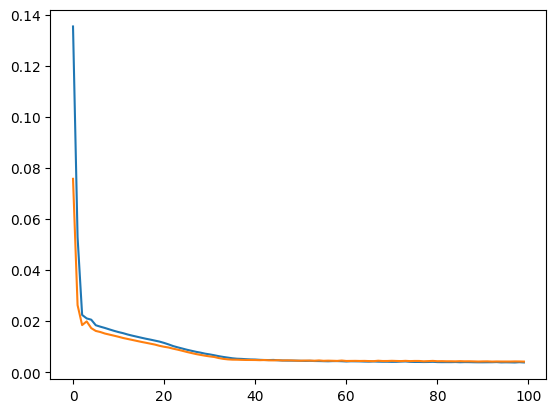

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])